## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x
import tensorflow as tf


TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
# Create a list for each type of label 
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt", "Sneaker","Bag", "Ankle Boot"]


###4. Find no.of samples in training and test dataset

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

###5. Find dimensions of an image in the dataset

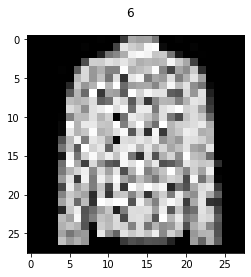

In [9]:
#Lets print the image as well
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

In [0]:
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')

### 6. Verify if existing labels/Classes are correct 

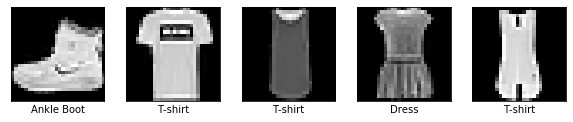

In [11]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = x_train/255
x_test_norm = x_test/255


###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_test_norm = tf.keras.backend.expand_dims(x_test_norm,3)
x_train_norm = tf.keras.backend.expand_dims(x_train_norm,3)



In [15]:
x_test_norm.shape

TensorShape([10000, 28, 28, 1])

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model1.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model1.add(tf.keras.layers.BatchNormalization())

###10. Import the necessary layers from keras to build the model

In [0]:

#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))


### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Flatten the output
model1.add(tf.keras.layers.Flatten())
#Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.25))
#Flatten the output
model2.add(tf.keras.layers.Flatten())
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

###13. Verify accuracy of the model

> 

In [0]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
#Train the model
model1.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3532 - accuracy: 0.8712 - val_loss: 0.2852 - val_accuracy: 0.8928
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2119 - accuracy: 0.9222 - val_loss: 0.2821 - val_accuracy: 0.8964
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1465 - accuracy: 0.9457 - val_loss: 0.2662 - val_accuracy: 0.9081
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0965 - accuracy: 0.9641 - val_loss: 0.3119 - val_accuracy: 0.9122
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0627 - accuracy: 0.9765 - val_loss: 0.3410 - val_accuracy: 0.9113
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0436 - accuracy: 0.9842 - val_loss: 0.4267 - val_accuracy: 0.9167
Epoch 7/10
60000/60000 [==========================

In [0]:
#To compile model2
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
#Train the model
model2.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3941 - accuracy: 0.8577 - val_loss: 0.3055 - val_accuracy: 0.8895
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2561 - accuracy: 0.9062 - val_loss: 0.2498 - val_accuracy: 0.9116
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2104 - accuracy: 0.9224 - val_loss: 0.2282 - val_accuracy: 0.9178
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1776 - accuracy: 0.9341 - val_loss: 0.2274 - val_accuracy: 0.9188
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1489 - accuracy: 0.9446 - val_loss: 0.2297 - val_accuracy: 0.9197
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1273 - accuracy: 0.9526 - val_loss: 0.2313 - val_accuracy: 0.9231
Epoch 7/10
60000/60000 [==============================] 

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_norm)

#plot_image(i, predictions[i], y_train, x_train)


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='red')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='red')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

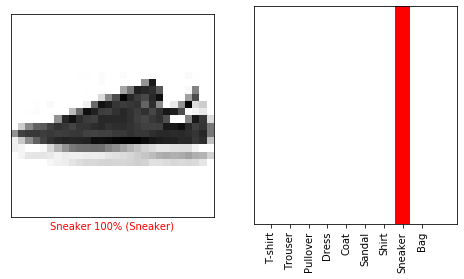

In [35]:
#Replace value of i with other index to check other product
i = 6
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

> Indented block



In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=5)
datagen.fit(x_train_norm)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

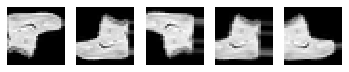

In [39]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_norm[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()